In [94]:
# Temel kütüphaneler
import numpy as np
import pandas as pd

# Görselleştirme
import matplotlib.pyplot as plt
import seaborn as sns

# Model açıklanabilirliği
import shap

# Grafik ayarları (estetik)
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("deep")

# Modelleme
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

# Değerlendirme
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



veri tanıtma

In [95]:
df = pd.read_csv(r"C:\Users\oguzh\OneDrive\Desktop\tahminDeneme\deutsche_bank_financial_performance.csv")

df.head(), df.columns

(       Date  Operating_Income    Expenses        Assets   Liabilities  \
 0  1/1/2015        4370861.07  3682573.85  1.363403e+08  1.494296e+08   
 1  1/2/2015        9556428.76  1186425.69  1.955172e+08  4.725052e+07   
 2  1/3/2015        7587945.48  3093297.62  1.519954e+08  1.756590e+08   
 3  1/4/2015        6387926.36  3230217.71  2.097483e+08  1.382626e+08   
 4  1/5/2015        2404167.76  2408588.02  8.124073e+07  2.773058e+08   
 
         Equity      Revenue   Cash_Flow  Net_Income  Debt_to_Equity   ROA  \
 0  59803407.08   9435946.42  1428845.20   688287.22            2.50  0.01   
 1  55281922.53  12470620.28  1029017.28  8370003.06            0.85  0.04   
 2  27447676.11  11882092.09  7320721.28  4494647.86            6.40  0.03   
 3  87293509.41   4000698.76  1925965.75  3157708.65            1.58  0.02   
 4  70924670.47   3940243.11  6659376.16    -4420.26            3.91  0.00   
 
    Profit_Margin  Interest_Expense  Tax_Expense  Dividend_Payout  
 0           0.0

veri tipi kontorlü ve atanması

In [96]:
print(df.dtypes)

Date                 object
Operating_Income    float64
Expenses            float64
Assets              float64
Liabilities         float64
Equity              float64
Revenue             float64
Cash_Flow           float64
Net_Income          float64
Debt_to_Equity      float64
ROA                 float64
Profit_Margin       float64
Interest_Expense    float64
Tax_Expense         float64
Dividend_Payout     float64
dtype: object


In [97]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')


In [98]:
print(df.dtypes)

Date                datetime64[ns]
Operating_Income           float64
Expenses                   float64
Assets                     float64
Liabilities                float64
Equity                     float64
Revenue                    float64
Cash_Flow                  float64
Net_Income                 float64
Debt_to_Equity             float64
ROA                        float64
Profit_Margin              float64
Interest_Expense           float64
Tax_Expense                float64
Dividend_Payout            float64
dtype: object


türkçe haline çevbirme

In [99]:
df = df.rename(columns={
    'Date': 'Tarih',
    'Operating_Income': 'Faaliyet_Kari',
    'Expenses': 'Gider',
    'Assets': 'Varliklar',
    'Liabilities': 'Borclar',
    'Equity': 'Ozsermaye',
    'Revenue': 'Gelir',
    'Cash_Flow': 'Nakit_Akisi',
    'Net_Income': 'Net_Kar',
    'Debt_to_Equity': 'Borc_Ozsermaye_Orani',
    'ROA': 'Aktif_Karliligi',
    'Profit_Margin': 'Kar_Marji',
    'Interest_Expense': 'Faiz_Gideri',
    'Tax_Expense': 'Vergi_Gideri',
    'Dividend_Payout': 'Temettu_Odemesi'
})

df.head()


,Tarih,Faaliyet_Kari,Gider,Varliklar,Borclar,Ozsermaye,Gelir,Nakit_Akisi,Net_Kar,Borc_Ozsermaye_Orani,Aktif_Karliligi,Kar_Marji,Faiz_Gideri,Vergi_Gideri,Temettu_Odemesi
0,2015-01-01,4370861.07,3682573.85,1.363403e+08,1.494296e+08,59803407.08,9435946.42,1428845.20,688287.22,2.50,0.01,0.07,609472.14,1042103.16,1170151.42
1,2015-01-02,9556428.76,1186425.69,1.955172e+08,4.725052e+07,55281922.53,12470620.28,1029017.28,8370003.06,0.85,0.04,0.67,699770.11,1329539.73,492998.93
2,2015-01-03,7587945.48,3093297.62,1.519954e+08,1.756590e+08,27447676.11,11882092.09,7320721.28,4494647.86,6.40,0.03,0.38,337977.34,345091.11,1603358.92
3,2015-01-04,6387926.36,3230217.71,2.097483e+08,1.382626e+08,87293509.41,4000698.76,1925965.75,3157708.65,1.58,0.02,0.79,1345468.95,1316373.62,426566.77
4,2015-01-05,2404167.76,2408588.02,8.124073e+07,2.773058e+08,70924670.47,3940243.11,6659376.16,-4420.26,3.91,0.00,0.00,175614.54,136655.30,2808563.51


In [100]:
print(df.columns.tolist())

['Tarih', 'Faaliyet_Kari', 'Gider', 'Varliklar', 'Borclar', 'Ozsermaye', 'Gelir', 'Nakit_Akisi', 'Net_Kar', 'Borc_Ozsermaye_Orani', 'Aktif_Karliligi', 'Kar_Marji', 'Faiz_Gideri', 'Vergi_Gideri', 'Temettu_Odemesi']


eksik veri kontorlü

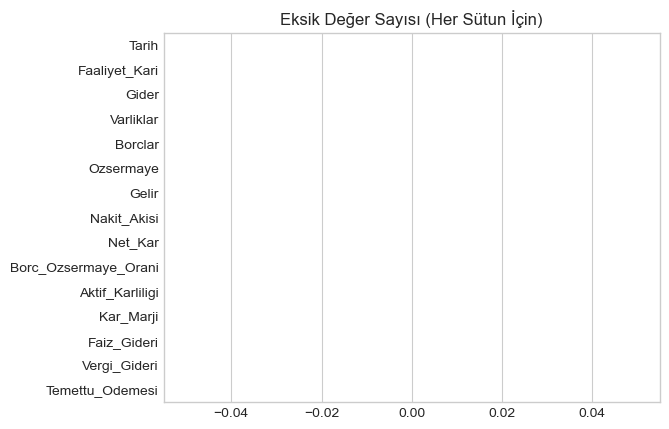

In [101]:
# Eksik veri sayısı
missing = df.isnull().sum().sort_values(ascending=False)
sns.barplot(x=missing.values, y=missing.index, palette="coolwarm")
plt.title("Eksik Değer Sayısı (Her Sütun İçin)")
plt.show()

finansal oranlar için sutun oluştumöa

In [102]:
print(df.columns.tolist())


['Tarih', 'Faaliyet_Kari', 'Gider', 'Varliklar', 'Borclar', 'Ozsermaye', 'Gelir', 'Nakit_Akisi', 'Net_Kar', 'Borc_Ozsermaye_Orani', 'Aktif_Karliligi', 'Kar_Marji', 'Faiz_Gideri', 'Vergi_Gideri', 'Temettu_Odemesi']


In [103]:
# Eğer Borç/Varlık oranı yoksa oluştur
if 'Borc_Varlik_Orani' not in df.columns:
    df['Borc_Varlik_Orani'] = df['Borclar'] / df['Varliklar']
    print(" Borc_Varlik_Orani sütunu eklendi.")
else:
    print(" Borc_Varlik_Orani zaten mevcut.")

print(df.columns.tolist())
df[['Borc_Varlik_Orani']].head()

 Borc_Varlik_Orani sütunu eklendi.
['Tarih', 'Faaliyet_Kari', 'Gider', 'Varliklar', 'Borclar', 'Ozsermaye', 'Gelir', 'Nakit_Akisi', 'Net_Kar', 'Borc_Ozsermaye_Orani', 'Aktif_Karliligi', 'Kar_Marji', 'Faiz_Gideri', 'Vergi_Gideri', 'Temettu_Odemesi', 'Borc_Varlik_Orani']


,Borc_Varlik_Orani
0,1.096005
1,0.241669
2,1.155686
3,0.659184
4,3.413384


In [104]:
df['Gelir_Buyume_Orani'] = df['Gelir'].pct_change()
df['Gider_Buyume_Orani'] = df['Gider'].pct_change()
df['NetKar_Buyume_Orani'] = df['Net_Kar'].pct_change()

# 2️⃣ Finansal oranlar
df['Kar_Marji'] = df['Net_Kar'] / df['Gelir']
df['Borc_Orani'] = df['Borclar'] / df['Varliklar']
df['Ozsermaye_Orani'] = df['Ozsermaye'] / df['Varliklar']

# 3️⃣ Eksik veya sonsuz değerleri temizle
df = df.replace([np.inf, -np.inf], np.nan)
df = df.fillna(0)

# Kontrol
print("Yeni özellikler eklendi:")
print(df[['Gelir_Buyume_Orani','Gider_Buyume_Orani','NetKar_Buyume_Orani','Kar_Marji','Borc_Orani','Ozsermaye_Orani']].head())

Yeni özellikler eklendi:
   Gelir_Buyume_Orani  Gider_Buyume_Orani  NetKar_Buyume_Orani  Kar_Marji  \
0            0.000000            0.000000             0.000000   0.072943   
1            0.321608           -0.677827            11.160625   0.671178   
2           -0.047193            1.607241            -0.463005   0.378271   
3           -0.663300            0.044263            -0.297451   0.789289   
4           -0.015111           -0.254357            -1.001400  -0.001122   

   Borc_Orani  Ozsermaye_Orani  
0    1.096005         0.438633  
1    0.241669         0.282747  
2    1.155686         0.180582  
3    0.659184         0.416182  
4    3.413384         0.873019  


net kar trend grafiği

c:\Users\oguzh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\oguzh\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


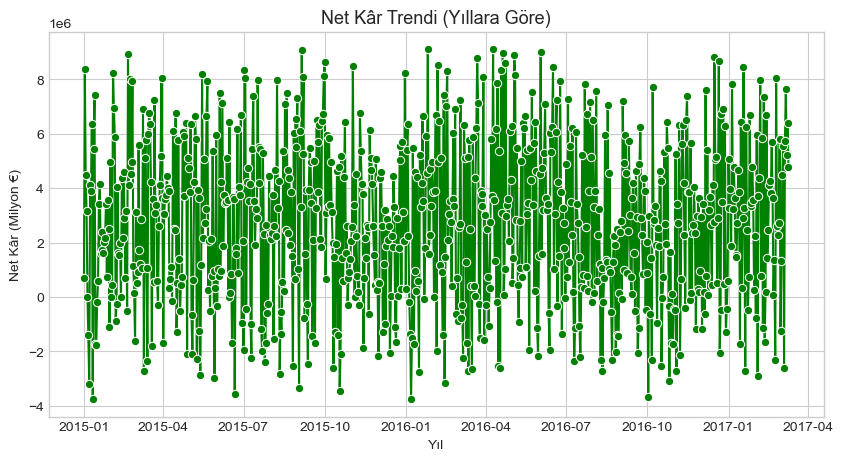

In [105]:
plt.figure(figsize=(10,5))
sns.lineplot(x='Tarih', y='Net_Kar', data=df, marker='o', color='green')
plt.title('Net Kâr Trendi (Yıllara Göre)', fontsize=13)
plt.xlabel('Yıl')
plt.ylabel('Net Kâr (Milyon €)')
plt.show()

Net kâr yıllar içinde dalgalı bir seyir izliyor.
Bazı dönemlerde belirgin artışlar, bazı dönemlerde ise düşüşler gözleniyor.


gelir gider karşılaştırma

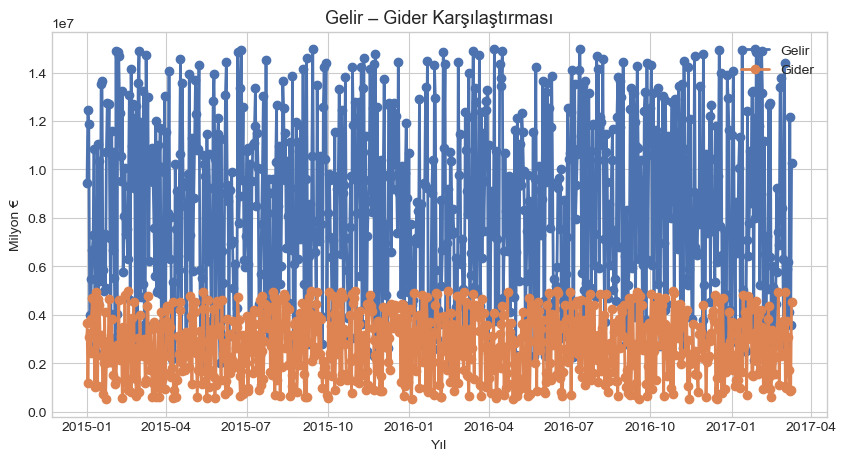

In [106]:
plt.figure(figsize=(10,5))
plt.plot(df['Tarih'], df['Gelir'], label='Gelir', marker='o', linewidth=2)
plt.plot(df['Tarih'], df['Gider'], label='Gider', marker='o', linewidth=2)
plt.title('Gelir – Gider Karşılaştırması', fontsize=13)
plt.xlabel('Yıl')
plt.ylabel('Milyon €')
plt.legend()
plt.show()

kolerasyn

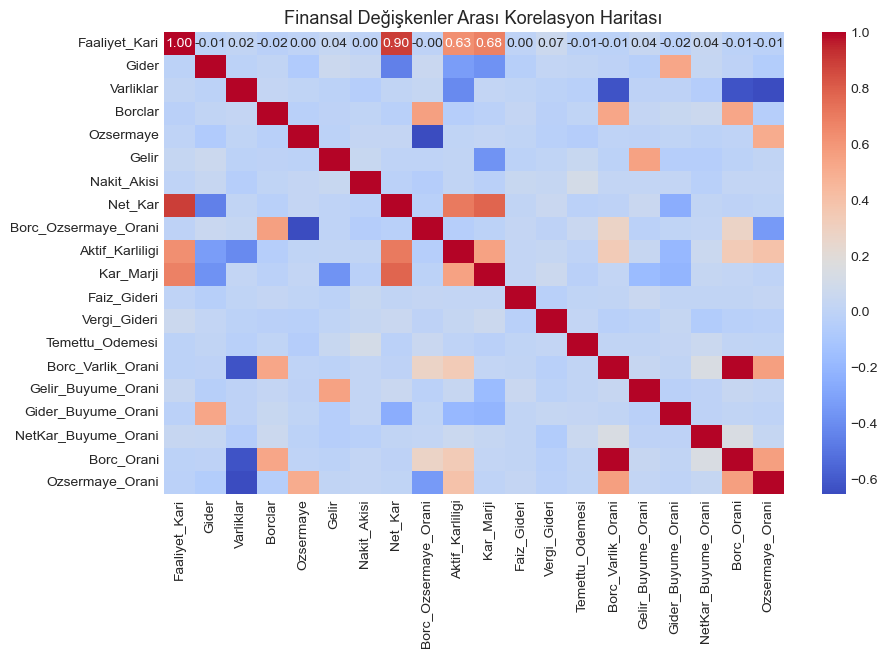

In [107]:
plt.figure(figsize=(10,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Finansal Değişkenler Arası Korelasyon Haritası', fontsize=13)
plt.show()

Korelasyon analizi sonucunda, kârlılığı artıran en güçlü faktörün gelir artışı olduğu,
kârlılığı azaltan en güçlü faktörün ise gider oranı olduğu tespit edilmiştir.

verilerin model için hazırlanması

In [108]:
X = df[['Gelir', 'Gider', 'Varliklar', 'Borclar', 'Ozsermaye',
        'Gelir_Buyume_Orani', 'Gider_Buyume_Orani', 'NetKar_Buyume_Orani',
        'Kar_Marji', 'Borc_Orani', 'Ozsermaye_Orani']]

y = df['Net_Kar']


eğitim ve test için verilerin bölünemsi

In [109]:
X_egitim, X_test, y_egitim, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

print("Eğitim veri boyutu:", X_egitim.shape)
print("Test veri boyutu:", X_test.shape)

Eğitim veri boyutu: (640, 11)
Test veri boyutu: (160, 11)


lineer regresyon ile tahmin modeli 

In [110]:
model_lr = LinearRegression()
model_lr.fit(X_egitim, y_egitim)

# Tahmin
y_tahmin_lr = model_lr.predict(X_test)

# Performans metrikleri
mae = mean_absolute_error(y_test, y_tahmin_lr)
rmse = np.sqrt(mean_squared_error(y_test, y_tahmin_lr))
r2 = r2_score(y_test, y_tahmin_lr)

print("Lineer Regresyon mdoeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mae:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse:.2f}")
print(f"R² (Açıklama Gücü): {r2:.3f}")

Lineer Regresyon mdoeli sonuçları
Ortalama Mutlak Hata (MAE): 1260756.10
Kök Ortalama Kare Hata (RMSE): 1615616.86
R² (Açıklama Gücü): 0.698


gradient boosting ile tahmin modeli

In [111]:
model_gb = GradientBoostingRegressor(random_state=42)
model_gb.fit(X_egitim, y_egitim)

# Tahmin
y_tahmin_gb = model_gb.predict(X_test)

# Performans metrikleri
mae_gb = mean_absolute_error(y_test, y_tahmin_gb)
rmse_gb = np.sqrt(mean_squared_error(y_test, y_tahmin_gb))
r2_gb = r2_score(y_test, y_tahmin_gb)

print("Gradient Boosting modeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mae_gb:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse_gb:.2f}")
print(f"R² (Açıklama Gücü): {r2_gb:.3f}")

Gradient Boosting modeli sonuçları
Ortalama Mutlak Hata (MAE): 301224.07
Kök Ortalama Kare Hata (RMSE): 423155.72
R² (Açıklama Gücü): 0.979


XGBRegressor modeli ile tahmin

In [112]:
from xgboost import XGBRegressor

# XGBoost Modeli
model_xgb = XGBRegressor(random_state=42, verbosity=0)
model_xgb.fit(X_egitim, y_egitim)

# Tahmin
y_tahmin_xgb = model_xgb.predict(X_test)

# Performans metrikleri
mae_xgb = mean_absolute_error(y_test, y_tahmin_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_tahmin_xgb))
r2_xgb = r2_score(y_test, y_tahmin_xgb)

print("XGBoost modeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mae_xgb:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse_xgb:.2f}")
print(f"R² (Açıklama Gücü): {r2_xgb:.3f}")


XGBoost modeli sonuçları
Ortalama Mutlak Hata (MAE): 296529.87
Kök Ortalama Kare Hata (RMSE): 434615.03
R² (Açıklama Gücü): 0.978


catboost ile tahmin

In [113]:
from catboost import CatBoostRegressor

# CatBoost Modeli
model_cb = CatBoostRegressor(verbose=0, random_state=42)
model_cb.fit(X_egitim, y_egitim)

# Tahmin
y_tahmin_cb = model_cb.predict(X_test)

# Performans metrikleri
mae_cb = mean_absolute_error(y_test, y_tahmin_cb)
rmse_cb = np.sqrt(mean_squared_error(y_test, y_tahmin_cb))
r2_cb = r2_score(y_test, y_tahmin_cb)

print("CatBoost modeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mae_cb:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse_cb:.2f}")
print(f"R² (Açıklama Gücü): {r2_cb:.3f}")


CatBoost modeli sonuçları
Ortalama Mutlak Hata (MAE): 261992.95
Kök Ortalama Kare Hata (RMSE): 381031.96
R² (Açıklama Gücü): 0.983


random forest regressor ile tahmin

In [114]:
from sklearn.ensemble import RandomForestRegressor

# Random Forest Modeli
model_rf = RandomForestRegressor(random_state=42)
model_rf.fit(X_egitim, y_egitim)

# Tahmin
y_tahmin_rf = model_rf.predict(X_test)

# Performans metrikleri
mae_rf = mean_absolute_error(y_test, y_tahmin_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_tahmin_rf))
r2_rf = r2_score(y_test, y_tahmin_rf)

print("Random Forest modeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mae_rf:.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse_rf:.2f}")
print(f"R² (Açıklama Gücü): {r2_rf:.3f}")


Random Forest modeli sonuçları
Ortalama Mutlak Hata (MAE): 341732.82
Kök Ortalama Kare Hata (RMSE): 526450.46
R² (Açıklama Gücü): 0.968


In [115]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RidgeCV

model_ridge = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=[0.1, 1.0, 10.0], cv=5)
)

model_ridge.fit(X_egitim, y_egitim)
y_tahmin_ridge = model_ridge.predict(X_test)

mae_ridge = mean_absolute_error(y_test, y_tahmin_ridge)
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_tahmin_ridge))
r2_ridge = r2_score(y_test, y_tahmin_ridge)

print("Ridge modeli sonuçları (ölçeklenmiş)")
print(f"MAE: {mae_ridge:.2f} | RMSE: {rmse_ridge:.2f} | R²: {r2_ridge:.3f}")


Ridge modeli sonuçları (ölçeklenmiş)
MAE: 1259344.23 | RMSE: 1606468.00 | R²: 0.702


MLPRegressor

In [116]:
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

model_mlp = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam',
                         max_iter=2000, random_state=42)
model_mlp.fit(X_egitim, y_egitim)

y_tahmin_mlp = model_mlp.predict(X_test)

print("MLPRegressor (Yapay Sinir Ağı) modeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mean_absolute_error(y_test, y_tahmin_mlp):.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {np.sqrt(mean_squared_error(y_test, y_tahmin_mlp)):.2f}")
print(f"R² (Açıklama Gücü): {r2_score(y_test, y_tahmin_mlp):.3f}")


MLPRegressor (Yapay Sinir Ağı) modeli sonuçları
Ortalama Mutlak Hata (MAE): 2424109.71
Kök Ortalama Kare Hata (RMSE): 2884776.46
R² (Açıklama Gücü): 0.038


Destek Vektör Regresyon

In [117]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

model_svr = make_pipeline(StandardScaler(), SVR(kernel='rbf', C=100, gamma=0.1, epsilon=0.1))
model_svr.fit(X_egitim, y_egitim)
y_tahmin_svr = model_svr.predict(X_test)

print("Destek Vektör Regresyon (SVR) modeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mean_absolute_error(y_test, y_tahmin_svr):.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {np.sqrt(mean_squared_error(y_test, y_tahmin_svr)):.2f}")
print(f"R² (Açıklama Gücü): {r2_score(y_test, y_tahmin_svr):.3f}")


Destek Vektör Regresyon (SVR) modeli sonuçları
Ortalama Mutlak Hata (MAE): 2419341.21
Kök Ortalama Kare Hata (RMSE): 2941695.35
R² (Açıklama Gücü): -0.000


Extra Tree

In [118]:
from sklearn.ensemble import ExtraTreesRegressor

model_et = ExtraTreesRegressor(random_state=42, n_estimators=500)
model_et.fit(X_egitim, y_egitim)
y_tahmin_et = model_et.predict(X_test)

print("Extra Trees modeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mean_absolute_error(y_test, y_tahmin_et):.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {np.sqrt(mean_squared_error(y_test, y_tahmin_et)):.2f}")
print(f"R² (Açıklama Gücü): {r2_score(y_test, y_tahmin_et):.3f}")


Extra Trees modeli sonuçları
Ortalama Mutlak Hata (MAE): 221111.40
Kök Ortalama Kare Hata (RMSE): 333652.04
R² (Açıklama Gücü): 0.987


Elasticnet

In [119]:
from sklearn.linear_model import ElasticNet

model_en = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
model_en.fit(X_egitim, y_egitim)
y_tahmin_en = model_en.predict(X_test)

print("ElasticNet modeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mean_absolute_error(y_test, y_tahmin_en):.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {np.sqrt(mean_squared_error(y_test, y_tahmin_en)):.2f}")
print(f"R² (Açıklama Gücü): {r2_score(y_test, y_tahmin_en):.3f}")


ElasticNet modeli sonuçları
Ortalama Mutlak Hata (MAE): 1278570.74
Kök Ortalama Kare Hata (RMSE): 1592688.07
R² (Açıklama Gücü): 0.707


HistGradientBoostingRegressor

In [120]:
from sklearn.ensemble import HistGradientBoostingRegressor

model_hgb = HistGradientBoostingRegressor(random_state=42)
model_hgb.fit(X_egitim, y_egitim)
y_tahmin_hgb = model_hgb.predict(X_test)

print("HistGradientBoosting modeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mean_absolute_error(y_test, y_tahmin_hgb):.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {np.sqrt(mean_squared_error(y_test, y_tahmin_hgb)):.2f}")
print(f"R² (Açıklama Gücü): {r2_score(y_test, y_tahmin_hgb):.3f}")


HistGradientBoosting modeli sonuçları
Ortalama Mutlak Hata (MAE): 254943.55
Kök Ortalama Kare Hata (RMSE): 378005.82
R² (Açıklama Gücü): 0.983


LGBMRegressor

In [121]:
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor(random_state=42, n_estimators=800, learning_rate=0.05, max_depth=6)
model_lgbm.fit(X_egitim, y_egitim)
y_tahmin_lgbm = model_lgbm.predict(X_test)

print("LightGBM modeli sonuçları")
print(f"MAE: {mean_absolute_error(y_test, y_tahmin_lgbm):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_tahmin_lgbm)):.2f}")
print(f"R²: {r2_score(y_test, y_tahmin_lgbm):.3f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000189 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2351
[LightGBM] [Info] Number of data points in the train set: 640, number of used features: 11
[LightGBM] [Info] Start training from score 2739492.546556
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive g

AdaBoostRegressor


In [122]:
from sklearn.ensemble import AdaBoostRegressor

model_ada = AdaBoostRegressor(n_estimators=300, learning_rate=0.1, random_state=42)
model_ada.fit(X_egitim, y_egitim)
y_tahmin_ada = model_ada.predict(X_test)

print("AdaBoost modeli sonuçları")
print(f"MAE: {mean_absolute_error(y_test, y_tahmin_ada):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_tahmin_ada)):.2f}")
print(f"R²: {r2_score(y_test, y_tahmin_ada):.3f}")


AdaBoost modeli sonuçları
MAE: 506,524.25
RMSE: 640184.96
R²: 0.953


BaggingRegressor

In [123]:
from sklearn.ensemble import BaggingRegressor

model_bag = BaggingRegressor(base_estimator=GradientBoostingRegressor(), n_estimators=50, random_state=42)
model_bag.fit(X_egitim, y_egitim)
y_tahmin_bag = model_bag.predict(X_test)

print("Bagging modeli sonuçları")
print(f"MAE: {mean_absolute_error(y_test, y_tahmin_bag):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_tahmin_bag)):.2f}")
print(f"R²: {r2_score(y_test, y_tahmin_bag):.3f}")


c:\Users\oguzh\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Bagging modeli sonuçları
MAE: 308,495.81
RMSE: 435100.04
R²: 0.978


KNeighborsRegressor


In [124]:
from sklearn.neighbors import KNeighborsRegressor

model_knn = KNeighborsRegressor(n_neighbors=5)
model_knn.fit(X_egitim, y_egitim)
y_tahmin_knn = model_knn.predict(X_test)

print("KNN modeli sonuçları")
print(f"MAE: {mean_absolute_error(y_test, y_tahmin_knn):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_tahmin_knn)):.2f}")
print(f"R²: {r2_score(y_test, y_tahmin_knn):.3f}")


KNN modeli sonuçları
MAE: 2,589,499.02
RMSE: 3109954.88
R²: -0.118


DecisionTreeRegressor


In [125]:
from sklearn.tree import DecisionTreeRegressor

model_dt = DecisionTreeRegressor(random_state=42, max_depth=6)
model_dt.fit(X_egitim, y_egitim)
y_tahmin_dt = model_dt.predict(X_test)

print("Decision Tree modeli sonuçları")
print(f"MAE: {mean_absolute_error(y_test, y_tahmin_dt):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_tahmin_dt)):.2f}")
print(f"R²: {r2_score(y_test, y_tahmin_dt):.3f}")


Decision Tree modeli sonuçları
MAE: 461,212.89
RMSE: 696378.94
R²: 0.944


StackingRegressor


In [126]:
from sklearn.ensemble import StackingRegressor

base_models = [
    ("cat", CatBoostRegressor(verbose=0, random_state=42)),
    ("gb", GradientBoostingRegressor(random_state=42)),
    ("lr", LinearRegression())
]

stack = StackingRegressor(estimators=base_models, final_estimator=RandomForestRegressor(random_state=42))
stack.fit(X_egitim, y_egitim)
y_tahmin_stack = stack.predict(X_test)

print("Stacking modeli sonuçları")
print(f"MAE: {mean_absolute_error(y_test, y_tahmin_stack):,.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_tahmin_stack)):.2f}")
print(f"R²: {r2_score(y_test, y_tahmin_stack):.3f}")


Stacking modeli sonuçları
MAE: 277,369.25
RMSE: 395218.48
R²: 0.982


BayesianRidge

In [127]:
from sklearn.linear_model import BayesianRidge

model_br = BayesianRidge()
model_br.fit(X_egitim, y_egitim)

# Tahmin
y_tahmin_br = model_br.predict(X_test)

# Performans metrikleri
mae_br = mean_absolute_error(y_test, y_tahmin_br)
rmse_br = np.sqrt(mean_squared_error(y_test, y_tahmin_br))
r2_br = r2_score(y_test, y_tahmin_br)

print("Bayesian Ridge modeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mae_br:,.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse_br:,.2f}")
print(f"R² (Açıklama Gücü): {r2_br:.3f}")


Bayesian Ridge modeli sonuçları
Ortalama Mutlak Hata (MAE): 2,224,199.55
Kök Ortalama Kare Hata (RMSE): 2,557,416.90
R² (Açıklama Gücü): 0.244


HuberRegressor

In [128]:
from sklearn.linear_model import HuberRegressor

model_hr = HuberRegressor(max_iter=1000)
model_hr.fit(X_egitim, y_egitim)

# Tahmin
y_tahmin_hr = model_hr.predict(X_test)

# Performans metrikleri
mae_hr = mean_absolute_error(y_test, y_tahmin_hr)
rmse_hr = np.sqrt(mean_squared_error(y_test, y_tahmin_hr))
r2_hr = r2_score(y_test, y_tahmin_hr)

print("Huber Regressor modeli sonuçları")
print(f"Ortalama Mutlak Hata (MAE): {mae_hr:,.2f}")
print(f"Kök Ortalama Kare Hata (RMSE): {rmse_hr:,.2f}")
print(f"R² (Açıklama Gücü): {r2_hr:.3f}")

Huber Regressor modeli sonuçları
Ortalama Mutlak Hata (MAE): 2,383,394.53
Kök Ortalama Kare Hata (RMSE): 2,857,276.44
R² (Açıklama Gücü): 0.057


In [129]:
sonuclar = {
    "Model": [
        "Lineer Regresyon",
        "Gradient Boosting",
        "XGBoost",
        "CatBoost",
        "Random Forest",
        "Ridge",
        "Bayesian Ridge",      
        "Huber Regressor",     
        "MLPRegressor",
        "Support Vector Regression",
        "Extra Trees",
        "ElasticNet",
        "HistGradientBoosting",
        "LightGBM",
        "AdaBoost",
        "Bagging",
        "KNeighborsRegressor",
        "Decision Tree",
        "Stacking"
    ],
    "MAE": [
        mae,
        mae_gb,
        mae_xgb,
        mae_cb,
        mae_rf,
        mae_ridge,
        mae_br,                 
        mae_hr,                
        mean_absolute_error(y_test, y_tahmin_mlp),
        mean_absolute_error(y_test, y_tahmin_svr),
        mean_absolute_error(y_test, y_tahmin_et),
        mean_absolute_error(y_test, y_tahmin_en),
        mean_absolute_error(y_test, y_tahmin_hgb),
        mean_absolute_error(y_test, y_tahmin_lgbm),
        mean_absolute_error(y_test, y_tahmin_ada),
        mean_absolute_error(y_test, y_tahmin_bag),
        mean_absolute_error(y_test, y_tahmin_knn),
        mean_absolute_error(y_test, y_tahmin_dt),
        mean_absolute_error(y_test, y_tahmin_stack)
    ],
    "RMSE": [
        rmse,
        rmse_gb,
        rmse_xgb,
        rmse_cb,
        rmse_rf,
        rmse_ridge,
        rmse_br,                
        rmse_hr,                
        np.sqrt(mean_squared_error(y_test, y_tahmin_mlp)),
        np.sqrt(mean_squared_error(y_test, y_tahmin_svr)),
        np.sqrt(mean_squared_error(y_test, y_tahmin_et)),
        np.sqrt(mean_squared_error(y_test, y_tahmin_en)),
        np.sqrt(mean_squared_error(y_test, y_tahmin_hgb)),
        np.sqrt(mean_squared_error(y_test, y_tahmin_lgbm)),
        np.sqrt(mean_squared_error(y_test, y_tahmin_ada)),
        np.sqrt(mean_squared_error(y_test, y_tahmin_bag)),
        np.sqrt(mean_squared_error(y_test, y_tahmin_knn)),
        np.sqrt(mean_squared_error(y_test, y_tahmin_dt)),
        np.sqrt(mean_squared_error(y_test, y_tahmin_stack))
    ],
    "R²": [
        r2,
        r2_gb,
        r2_xgb,
        r2_cb,
        r2_rf,
        r2_ridge,
        r2_br,                  
        r2_hr,                  
        r2_score(y_test, y_tahmin_mlp),
        r2_score(y_test, y_tahmin_svr),
        r2_score(y_test, y_tahmin_et),
        r2_score(y_test, y_tahmin_en),
        r2_score(y_test, y_tahmin_hgb),
        r2_score(y_test, y_tahmin_lgbm),
        r2_score(y_test, y_tahmin_ada),
        r2_score(y_test, y_tahmin_bag),
        r2_score(y_test, y_tahmin_knn),
        r2_score(y_test, y_tahmin_dt),
        r2_score(y_test, y_tahmin_stack)
    ]
}

# DataFrame oluştur
sonuc_df = pd.DataFrame(sonuclar)

# R²’ye göre büyükten küçüğe sırala
sonuc_df = sonuc_df.sort_values(by="R²", ascending=False).reset_index(drop=True)
sonuc_df.index = sonuc_df.index + 1
# Biçimli şekilde göster
print("Model Performans Karşılaştırması:")
display(
    sonuc_df.style.background_gradient(cmap="Greens").format({
        "MAE": "{:,.2f}".format,
        "RMSE": "{:,.2f}".format,
        "R²": "{:.3f}".format
    })
)

Model Performans Karşılaştırması:


,Model,MAE,RMSE,R²
1,Extra Trees,"221,111.40","333,652.04",0.987
2,HistGradientBoosting,"254,943.55","378,005.82",0.983
3,CatBoost,"261,992.95","381,031.96",0.983
4,Stacking,"277,369.25","395,218.48",0.982
5,LightGBM,"254,134.31","395,247.46",0.982
6,Gradient Boosting,"301,224.07","423,155.72",0.979
7,XGBoost,"296,529.87","434,615.03",0.978
8,Bagging,"308,495.81","435,100.04",0.978
9,Random Forest,"341,732.82","526,450.46",0.968
10,AdaBoost,"506,524.25","640,184.96",0.953


 91%|==================  | 146/160 [00:11<00:01]       

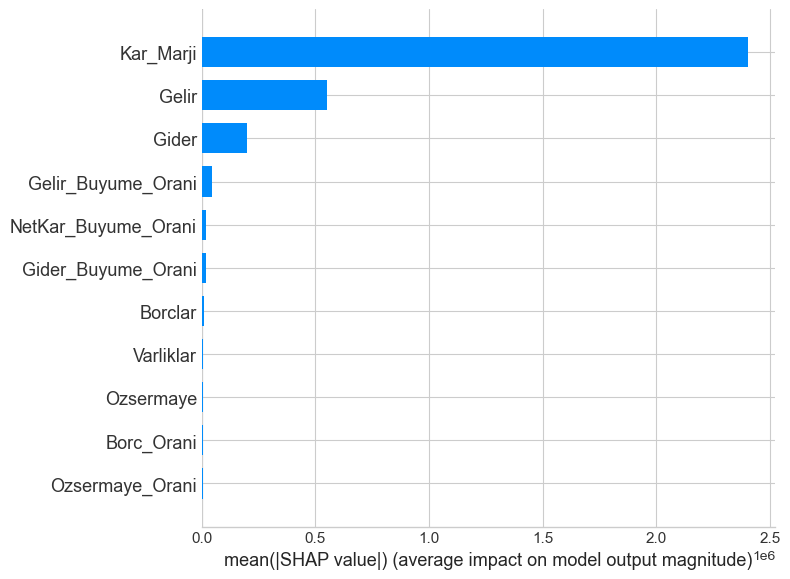

In [130]:
explainer = shap.Explainer(model_et, X_test)
shap_values = explainer(X_test)

shap.summary_plot(shap_values, X_test, plot_type="bar")


In [131]:
yeni_veri = pd.DataFrame({
    'Gelir': [1.25e7],          # 12.5 milyon €
    'Gider': [6.5e6],           # 6.5 milyon €
    'Varliklar': [1.9e8],
    'Borclar': [1.3e8],
    'Ozsermaye': [7.0e7],
    'Gelir_Buyume_Orani': [0.05],
    'Gider_Buyume_Orani': [-0.02],
    'NetKar_Buyume_Orani': [0.04],
    'Kar_Marji': [0.25],
    'Borc_Orani': [0.63],
    'Ozsermaye_Orani': [0.37]
})

tahmin = model_et.predict(yeni_veri)[0]

print(f"Tahmin Edilen Net Kâr: {tahmin:,.2f} €")

Tahmin Edilen Net Kâr: 2,983,167.99 €
